# Machine Learning en la Industria

Empecemos por importar las librerías que necesitaremos más adelante.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.utils.fixes import signature
from sklearn.svm import SVC


Leemos los datos y les damos una visualización rápida.

In [48]:
pd.options.display.max_columns=50
data=pd.read_csv('multipleChoiceResponses.csv')
data.head()

C:\Users\Carlos Felipe\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,Q7_OTHER_TEXT,Q8,Q9,Q10,Q11_Part_1,Q11_Part_2,Q11_Part_3,Q11_Part_4,Q11_Part_5,Q11_Part_6,Q11_Part_7,Q11_OTHER_TEXT,Q12_MULTIPLE_CHOICE,Q12_Part_1_TEXT,Q12_Part_2_TEXT,...,Q47_Part_15,Q47_Part_16,Q48,Q49_Part_1,Q49_Part_2,Q49_Part_3,Q49_Part_4,Q49_Part_5,Q49_Part_6,Q49_Part_7,Q49_Part_8,Q49_Part_9,Q49_Part_10,Q49_Part_11,Q49_Part_12,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
0,Duration (in seconds),What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,Select the title most similar to your current ...,In what industry is your current employer/cont...,In what industry is your current employer/cont...,How many years of experience do you have in yo...,What is your current yearly compensation (appr...,Does your current employer incorporate machine...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,"Do you consider ML models to be ""black boxes"" ...",What tools and methods do you use to make your...,What tools and methods do you use to make your...,What tools and methods do you use to make your...,What tools and methods do you use to make your...,What tools and methods do you use to make your...,What tools and methods do you use to make your...,What tools and methods do you use to make your...,What tools and methods do you use to make your...,What tools and methods do you use to make your...,What tools and methods do you use to make your...,What tools and methods do you use to make your...,What tools and methods do you use to make your...,What tools and methods do you use to make your...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...
1,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,0,NaN,NaN,I do not know,Analyze and understand data to influence produ...,Build and/or run a machine learning service th...,Build and/or run the data infrastructure that ...,NaN,Do research that advances the state of the art...,NaN,NaN,-1,"Cloud-based data software & APIs (AWS, GCP, Az...",-1,-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,-1,5-10,"10-20,000",No (we do not use ML methods),NaN,NaN,NaN,NaN,NaN,None of these activities are an important part...,NaN,-1,"Basic statistical software (Microsoft Excel, G...",1,-1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,

### Haremos algunas gráficas para describir y entender un poco los datos de la encuesta.

Text(0.5,0.98,'Select any activities that make up an important part of your role at work')

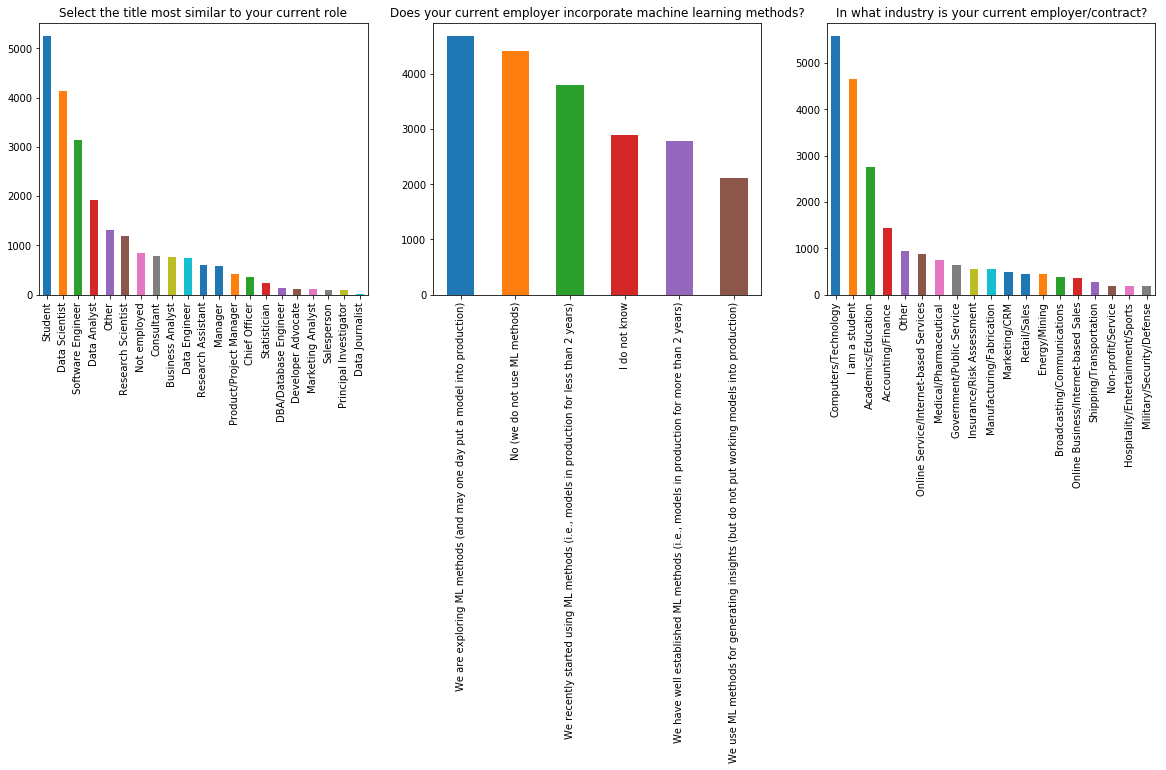

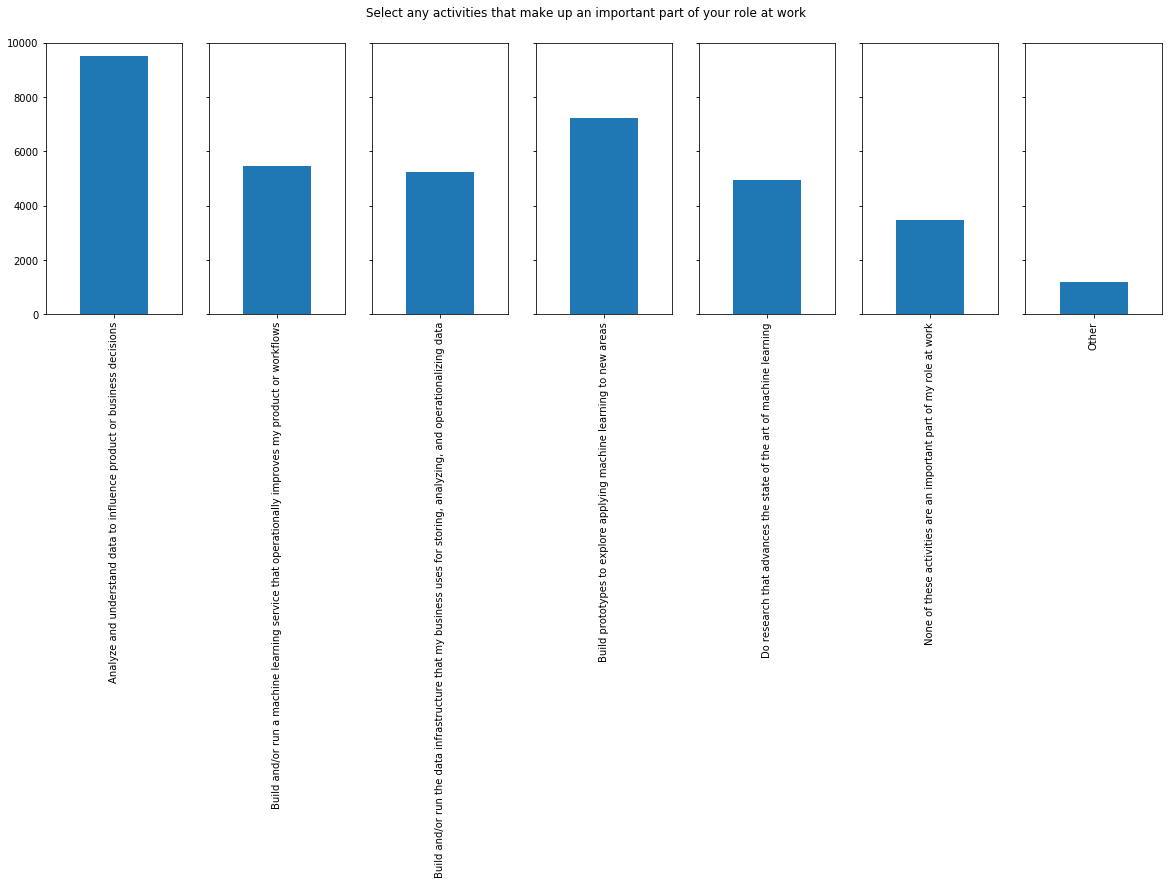

In [49]:
data=data.drop(data.index[0])

employer=data['Q10']
title=data['Q6']
industry=data['Q7']

fig=plt.figure(figsize=(20,5))
plt.subplot(131)
title.value_counts().plot(kind='bar', title='Select the title most similar to your current role')
plt.subplot(132)
employer.value_counts().plot(kind='bar', title='Does your current employer incorporate machine learning methods?')
plt.subplot(133)
industry.value_counts().plot(kind='bar', title='In what industry is your current employer/contract?')

act1=data['Q11_Part_1']
act2=data['Q11_Part_2']
act3=data['Q11_Part_3']
act4=data['Q11_Part_4']
act5=data['Q11_Part_5']
act6=data['Q11_Part_6']
act7=data['Q11_Part_7']

fig=plt.figure(figsize=(20,5))
ax1=plt.subplot(171)
act1.value_counts().plot(kind='bar')
ax2=plt.subplot(172, sharey=ax1)
act2.value_counts().plot(kind='bar')
plt.subplot(173, sharey=ax1)
ax3=act3.value_counts().plot(kind='bar')
plt.subplot(174, sharey=ax1)
ax4=act4.value_counts().plot(kind='bar')
plt.subplot(175, sharey=ax1)
ax5=act5.value_counts().plot(kind='bar')
plt.subplot(176, sharey=ax1)
ax6=act6.value_counts().plot(kind='bar')
plt.subplot(177, sharey=ax1)
ax7=act7.value_counts().plot(kind='bar')
fig.suptitle('Select any activities that make up an important part of your role at work')

Se pueden notar varias cosas interesantes:
    1. Que Machine Learning está aún en una etapa prematura y que de momento los más curiosos son los estudiantes.
    2. Que en la industria, la principal motivación para aprender Machine Learning la tienen aquellos que trabajan en análisis de datos para toma de decisiones de negocio. Gracias a esto se ha generado la curiosidad por lo métodos de ML pero no se tienen aún los conocimientos suficientes.
    3. Que, como se espera, la Industria de Computer Science es la primera en implementar los métodos, pues son propios de su campo de estudio. En el mismo sentido, la academia va detrás pues es en ella en la que se han comenzado a ver los primeros resultados de los algoritmos. No obstante, notar que el campo de las Finanzas ha sido el primero en notar el potencial de la técnica y ya es pionero en la implementación de ML.

Queremos estudiar ML en la Industria, así que empezaremos por deshacernos de las encuestas de personas que no trabajan en la industria. Estos son: estudiantes y aquellos que no usan ML en su trabajo.

In [50]:
data_work=data[data.Q10 != 'No (we do not use ML methods)']
data_work=data_work[data_work.Q10 != 'I do not know']
data_work=data_work[data_work.Q11_Part_6 != 'None of these activities are an important part of my role at work']
data_work=data_work[data_work.Q11_Part_7 != 'Other']
data_work=data_work[data_work.Q6 != 'Not employed']
data_work=data_work[data_work.Q6 != 'Student']
data_work=data_work[data_work.Q7 != 'I am a student']

Ahora analicemos algunas variables de aquellos que están en la industria:
    - Género
    - Edad
    - País
    - Nivel de educación
    - Área de estudios
    - Título
    - Industria

In [51]:
gender=data_work['Q1']
age=data_work['Q2']
country=data_work['Q3']
education=data_work['Q4']
major=data_work['Q5']
title=data_work['Q6']
industry=data_work['Q7']

Text(0.5,1,'Major')

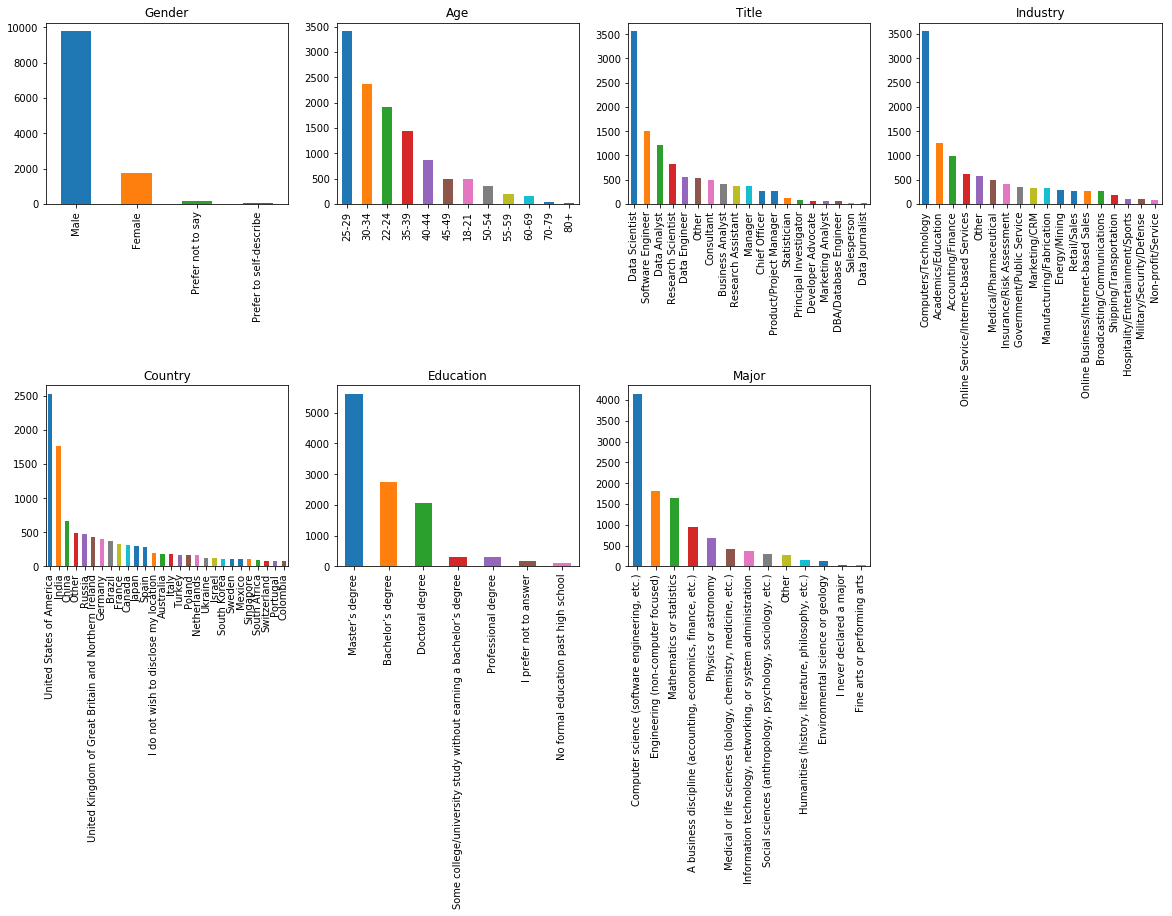

In [52]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=1.0)
plt.subplot(2,4,1)
gender.value_counts().plot(kind='bar')
plt.title('Gender')
plt.subplot(2,4,2)
age.value_counts().plot(kind='bar')
plt.title('Age')
plt.subplot(2,4,3)
title.value_counts().plot(kind='bar')
plt.title('Title')
plt.subplot(2,4,4)
industry.value_counts().plot(kind='bar')
plt.title('Industry')
plt.subplot(2,4,5)
country.value_counts()[:28].plot(kind='bar')
plt.title('Country')
plt.subplot(2,4,6)
education.value_counts().plot(kind='bar')
plt.title('Education')
plt.subplot(2,4,7)
major.value_counts().plot(kind='bar')
plt.title('Major')

Son varias las anotaciones:
    1. Que ML está fuerte en las generaciones más jóvenes. Principalmente de 25-29 años pues son los que ya llevan algo de experiencia en la industria y han logrado salir de la academia.
    2. Que las ingenierías y las ciencias básicas son las que dominan el campo, lo cual es consistente con sus habilidades y formación académica. No obstante, el interés se ha logrado despertar hasta en áreas de cuencias sociales y arte.
    3. Que el dominio de Estados Unidos es predominante en la materia, aunque la relevancia de India es muy importante y sorprendentemente superior a China. Sin embargo, América Latina logra entrar dentro del top 30 de países con: Brasil, México y Colombia.

Ahora, dada la gran cantidad de datos y de preguntas en la encuesta. Nos centraremos en aquellas que considero son las más relevantes para el análisis de ML en la Industria.

In [53]:
data_work=data_work[['Q1','Q2','Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11_Part_1', 'Q11_Part_2', 'Q11_Part_3', 'Q11_Part_4', 'Q11_Part_5', 'Q16_Part_1', 'Q16_Part_2', 'Q16_Part_3', 'Q16_Part_4', 'Q16_Part_5', 'Q16_Part_6', 'Q16_Part_7', 'Q16_Part_8', 'Q16_Part_9', 'Q16_Part_10', 'Q16_Part_11', 'Q16_Part_12', 'Q16_Part_13', 'Q16_Part_14', 'Q16_Part_15', 'Q16_Part_16','Q31_Part_1', 'Q31_Part_2', 'Q31_Part_3', 'Q31_Part_4', 'Q31_Part_5', 'Q31_Part_6', 'Q31_Part_7', 'Q31_Part_8', 'Q31_Part_9', 'Q31_Part_10', 'Q31_Part_11']]

data_work.columns = ['Género', 'Edad', 'País', 'Nivel de Educación', 'Carrera', 'Labor', 'Industria', 'Experiencia', 'Salario', 'ML en el trabajo', 'Analizar datos', 'Construir o correr ML', 'Construir o correr Infraestructura', 'Construir prototipos', 'Investigación', 'Python', 'R', 'SQL', 'Bash', 'Java', 'Javascript', 'VBA', 'C/C++', 'MATLAB', 'Scala', 'Julia', 'Go', 'C+/.NET', 'PHP', 'Ruby', 'Stata', 'Audio Data', 'Categorical Data', 'Genetic Data','Geospatial Data', 'Image Data', 'Numerical Data', 'Sensor Data', 'Tabular Data', 'Text Data', 'Time Series Data', 'Video Data']

El salario será de especial interés así que no nos interesan los que no muestran su salario.

In [54]:
data_work=data_work[data_work.Salario != 'I do not wish to disclose my approximate yearly compensation']

Así nos queda nuestra base de datos

In [55]:
data_work.head()

,Género,Edad,País,Nivel de Educación,Carrera,Labor,Industria,Experiencia,Salario,ML en el trabajo,Analizar datos,Construir o correr ML,Construir o correr Infraestructura,Construir prototipos,Investigación,Python,R,SQL,Bash,Java,Javascript,VBA,C/C++,MATLAB,Scala,Julia,Go,C+/.NET,PHP,Ruby,Stata,Audio Data,Categorical Data,Genetic Data,Geospatial Data,Image Data,Numerical Data,Sensor Data,Tabular Data,Text Data,Time Series Data,Video Data
8,Male,18-21,India,Master’s degree,"Information technology, networking, or system ...",Other,Other,0-1,"0-10,000","We recently started using ML methods (i.e., mo...",NaN,Build and/or run a machine learning service th...,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Image Data,Numerical Data,NaN,Tabular Data,Text Data,NaN,NaN
10,Male,30-34,Hungary,Master’s degree,Engineering (non-computer focused),Software Engineer,Online Service/Internet-based Services,3-4,"20-30,000","We have well established ML methods (i.e., mod...",NaN,Build and/or run a machine learning service th...,Build and/or run the data infrastructure that ...,NaN,NaN,Python,NaN,SQL,NaN,Java,Javascript/Typescript,NaN,NaN,NaN,NaN,NaN,NaN,C#/.NET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Numerical Data,NaN,Tabular Data,Text Data,Time Series Data,NaN
12,Male,40-44,United States of America,Master’s degree,Engineering (non-computer focused),Data Scientist,Other,5-10,"125-150,000","We recently started using ML methods (i.e., mo...",NaN,Build and/or run a machine learning service th...,NaN,NaN,NaN,Python,NaN,SQL,NaN,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C#/.NET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Text Data,NaN,NaN
14,Male,25-29,United States of America,Bachelor’s degree,Mathematics or statistics,Research Assistant,Academics/Education,1-2,"30-40,000",We are exploring ML methods (and may one day p...,Analyze and understand data to influence produ...,NaN,NaN,Build prototypes to explore applying machine l...,Do research that advances the state of the art...,Python,R,SQL,Bash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C#/.NET,NaN,NaN,NaN,NaN,NaN,Genetic Data,NaN,NaN,Numerical Data,NaN,NaN,Text Data,Time Series Data,NaN
15,Female,25-29,Argentina,Bachelor’s degree,"A business discipline (accounting, economics, ...",Data Analyst,Other,1-2,"10-20,000","We have well established ML methods (i.e., mod...",Analyze and understand data to influence produ...,NaN,NaN,NaN,NaN,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tabular Data,NaN,NaN,NaN


## K-means inicial

Buscaremos correlaciones en los datos. Queremos ver cómo se agrupan. Por tanto, usaremos K-means para ver los clusters que se generan entre el set de datos. 
Empezamos por convertir nuestra información categórica en etiquetas de número con LabelEncoder. Esto es, un preprocesamiento de los datos.

In [56]:
dict_clases = {}
data_encode=data_work.copy()
index=data_encode.columns
i=0
for column in data_encode.columns:
    if data_encode[column].dtype == type(object):
        le = LabelEncoder()
        le.fit(data_encode[column].astype(str))
        clases=le.classes_
        dict_clases[index[i]]=clases
        data_encode[column] = le.fit_transform(data_encode[column].astype(str))
        i+=1

Para optimizar el k, usamos el método del 'codo'. Para esto, calculamos la distancia cuadrada de los vectores a cada cluster y buscamos el codo en la gráfica en forma de brazo.

Text(0,0.5,'Suma de distancias cuadradas')

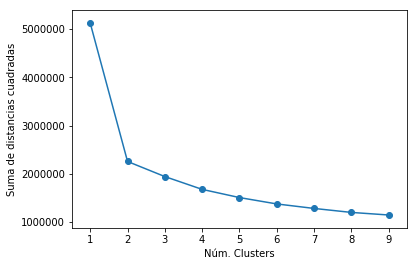

In [57]:
distancias=[]
for i in range(1,10):
    km=KMeans(n_clusters=i)
    km.fit(data_encode)
    distancias.append(km.inertia_)

n_cluster=np.linspace(1,len(distancias),len(distancias))
plt.plot(n_cluster,distancias)
plt.scatter(n_cluster,distancias)
plt.xlabel('Núm. Clusters')
plt.ylabel('Suma de distancias cuadradas')

Notamos que el número de clusters óptimo es 2. No obstante, probaremos con 2, 3, 4 y 5 a ver qué encontramos.
La información que extraeremos serán los centroides de cada cluster para saber alrededor de qué etiquetas se están agrupando los datos. Para esto, fue necesario guardar en un diccionario las etiquetas y con esto, convertimos el centroide a su vector de etiquetas más cercano, ya que esto es lo que queremos evaluar.

### 2 clusters

In [58]:
kmeans = KMeans(n_clusters=2).fit(data_encode)
labels=kmeans.labels_
centroids=kmeans.cluster_centers_
centroids=np.round(centroids)
fil,col=centroids.shape

list_clases=list(dict_clases.values())
list_nombres=[]
for f in range(fil):
    list_lab=[]
    for c in range(col):
        list_lab.append(list_clases[c][int(centroids[f,c])])
    list_nombres.append(list_lab)
print('Cluster 1:')
print([x for x in list_nombres[0] if x != 'nan'])
print('Cluster 2:')
print([x for x in list_nombres[1] if x != 'nan'])

Cluster 1:
['Male', '30-34', 'Greece', 'I prefer not to answer', 'Fine arts or performing arts', 'Marketing Analyst', 'Insurance/Risk Assessment', '20-25', '300-400,000', 'We recently started using ML methods (i.e., models in production for less than 2 years)', 'Python']
Cluster 2:
['Male', '30-34', 'Switzerland', 'I prefer not to answer', 'Humanities (history, literature, philosophy, etc.)', 'Manager', 'Insurance/Risk Assessment', '20-25', '300-400,000', 'We recently started using ML methods (i.e., models in production for less than 2 years)', 'Analyze and understand data to influence product or business decisions', 'Build prototypes to explore applying machine learning to new areas', 'Python', 'Numerical Data']


### 3 clusters

In [59]:
kmeans = KMeans(n_clusters=3).fit(data_encode)
labels=kmeans.labels_
centroids=kmeans.cluster_centers_
centroids=np.round(centroids)
fil,col=centroids.shape

list_clases=list(dict_clases.values())
list_nombres=[]
for f in range(fil):
    list_lab=[]
    for c in range(col):
        list_lab.append(list_clases[c][int(centroids[f,c])])
    list_nombres.append(list_lab)
print('Cluster 1:')
print([x for x in list_nombres[0] if x != 'nan'])
print('Cluster 2:')
print([x for x in list_nombres[1] if x != 'nan'])
print('Cluster 3:')
print([x for x in list_nombres[2] if x != 'nan'])

Cluster 1:
['Male', '30-34', 'Tunisia', 'I prefer not to answer', 'Humanities (history, literature, philosophy, etc.)', 'Manager', 'Insurance/Risk Assessment', '20-25', '300-400,000', 'We recently started using ML methods (i.e., models in production for less than 2 years)', 'Analyze and understand data to influence product or business decisions', 'Build prototypes to explore applying machine learning to new areas', 'Python', 'Numerical Data']
Cluster 2:
['Male', '30-34', 'Czech Republic', 'I prefer not to answer', 'Humanities (history, literature, philosophy, etc.)', 'Other', 'Marketing/CRM', '25-30', '400-500,000', 'We recently started using ML methods (i.e., models in production for less than 2 years)', 'Python']
Cluster 3:
['Male', '30-34', 'Italy', 'I prefer not to answer', 'Fine arts or performing arts', 'Manager', 'Hospitality/Entertainment/Sports', '2-3', '250-300,000', 'We recently started using ML methods (i.e., models in production for less than 2 years)', 'Analyze and unders

### 4 clusters

In [60]:
kmeans = KMeans(n_clusters=4).fit(data_encode)
labels=kmeans.labels_
centroids=kmeans.cluster_centers_
centroids=np.round(centroids)
fil,col=centroids.shape

list_clases=list(dict_clases.values())
list_nombres=[]
for f in range(fil):
    list_lab=[]
    for c in range(col):
        list_lab.append(list_clases[c][int(centroids[f,c])])
    list_nombres.append(list_lab)
print('Cluster 1:')
print([x for x in list_nombres[0] if x != 'nan'])
print('Cluster 2:')
print([x for x in list_nombres[1] if x != 'nan'])
print('Cluster 3:')
print([x for x in list_nombres[2] if x != 'nan'])
print('Cluster 4:')
print([x for x in list_nombres[3] if x != 'nan'])

Cluster 1:
['Male', '30-34', 'Italy', 'I prefer not to answer', 'Environmental science or geology', 'Manager', 'Government/Public Service', '2-3', '200-250,000', 'We have well established ML methods (i.e., models in production for more than 2 years)', 'Analyze and understand data to influence product or business decisions', 'Python', 'Numerical Data']
Cluster 2:
['Male', '30-34', 'Tunisia', 'I prefer not to answer', 'Humanities (history, literature, philosophy, etc.)', 'Manager', 'Insurance/Risk Assessment', '20-25', '300-400,000', 'We recently started using ML methods (i.e., models in production for less than 2 years)', 'Analyze and understand data to influence product or business decisions', 'Build prototypes to explore applying machine learning to new areas', 'Python', 'Numerical Data']
Cluster 3:
['Male', '25-29', 'Hungary', 'No formal education past high school', 'Mathematics or statistics', 'Salesperson', 'Shipping/Transportation', '5-10', '90-100,000']
Cluster 4:
['Male', '30-34

### 5 clusters

In [61]:
kmeans = KMeans(n_clusters=5).fit(data_encode)
labels=kmeans.labels_
centroids=kmeans.cluster_centers_
centroids=np.round(centroids)
fil,col=centroids.shape

list_clases=list(dict_clases.values())
list_nombres=[]
for f in range(fil):
    list_lab=[]
    for c in range(col):
        list_lab.append(list_clases[c][int(centroids[f,c])])
    list_nombres.append(list_lab)
print('Cluster 1:')
print([x for x in list_nombres[0] if x != 'nan'])
print('Cluster 2:')
print([x for x in list_nombres[1] if x != 'nan'])
print('Cluster 3:')
print([x for x in list_nombres[2] if x != 'nan'])
print('Cluster 4:')
print([x for x in list_nombres[3] if x != 'nan'])
print('Cluster 5:')
print([x for x in list_nombres[3] if x != 'nan'])

Cluster 1:
['Male', '25-29', 'Greece', 'Master’s degree', 'Mathematics or statistics', 'Salesperson', 'Shipping/Transportation', '5-10', '90-100,000']
Cluster 2:
['Male', '30-34', 'Switzerland', 'Master’s degree', 'Information technology, networking, or system administration', 'Research Assistant', 'Retail/Sales', '4-5', '90-100,000', 'We use ML methods for generating insights (but do not put working models into production)']
Cluster 3:
['Male', '30-34', 'Italy', 'I prefer not to answer', 'Environmental science or geology', 'Manager', 'Government/Public Service', '2-3', '200-250,000', 'We have well established ML methods (i.e., models in production for more than 2 years)', 'Analyze and understand data to influence product or business decisions', 'Python', 'Numerical Data']
Cluster 4:
['Male', '30-34', 'Tunisia', 'I prefer not to answer', 'Fine arts or performing arts', 'Developer Advocate', 'Government/Public Service', '2-3', '250-300,000', 'We have well established ML methods (i.e., m

### Observaciones:
Notamos que en general la agrupación en cada cluster no tiene mucho sentido.
1. Los datos se están agrupando geográficamente en países con poca relevancia. 
2. Las carreras alrededor de las que se agrupan son las menos populares en ML.
3. Los cargos más importantes son los administraticos.
4. El gobierno es la industria más importante (Aunque esto no es tan descabellado pues ML ha mostrado aplicaciones muy interesantes para Seguridad).

# K-means con Continentes
La primera teoría a probar es que el agrupamiento geográfico por países es impreciso al volver los países una etiqueta con Label Encoder pues los números no tienen relación alguna con la ubicación geográfica.

Así pues, decidimos convertir los países a su respectivo continente pues las diferencias numéricas son más pequeñás. Probamos nuevamente para varios clusters.

In [62]:

paises=np.unique(data_work['País'].values)
dic_paises={'País': paises}
continentes=np.array(['Suramérica', 'Oceanía', 'Europa', 'Asia', 'Europa', 'Europa', 'Suramérica', 'Norteamérica', 'Suramérica', 'Asia', 'Suramérica', 'Europa', 'Europa', 'África', 'Europa', 'Europa', 'Europa', 'Europa','Asia','Europa', 'Otro', 'Asia', 'Asia','Asia','Europa','Asia', 'Europa', 'Asia', 'África', 'Asia', 'Norteamérica', 'África', 'Europa', 'Oceanía', 'África', 'Europa', 'Otro', 'Asia', 'Suramérica', 'Asia', 'Europa', 'Europa', 'Asia', 'Europa', 'Asia', 'Asia', 'África', 'Asia', 'Europa', 'Europa', 'Europa', 'Asia', 'África', 'Europa', 'Europa', 'Europa', 'Norteamérica', 'Asia'])
dic_paises['Continente']= continentes

col_paises=data_work['País'].values

arr_continentes=[]

for i in range(len(col_paises)):
    for j in range(len(continentes)):
        if(col_paises[i]==dic_paises['País'][j]):
            arr_continentes.append(dic_paises['Continente'][j])


In [20]:
df1=pd.DataFrame()
df1['Continente']=arr_continentes
data_work['País']=df1['Continente']
data_work = data_work.rename(columns={'País': 'Continente'})

Así nos queda el dataset.

In [63]:
data_work.head()

,Género,Edad,País,Nivel de Educación,Carrera,Labor,Industria,Experiencia,Salario,ML en el trabajo,Analizar datos,Construir o correr ML,Construir o correr Infraestructura,Construir prototipos,Investigación,Python,R,SQL,Bash,Java,Javascript,VBA,C/C++,MATLAB,Scala,Julia,Go,C+/.NET,PHP,Ruby,Stata,Audio Data,Categorical Data,Genetic Data,Geospatial Data,Image Data,Numerical Data,Sensor Data,Tabular Data,Text Data,Time Series Data,Video Data
8,Male,18-21,India,Master’s degree,"Information technology, networking, or system ...",Other,Other,0-1,"0-10,000","We recently started using ML methods (i.e., mo...",NaN,Build and/or run a machine learning service th...,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Image Data,Numerical Data,NaN,Tabular Data,Text Data,NaN,NaN
10,Male,30-34,Hungary,Master’s degree,Engineering (non-computer focused),Software Engineer,Online Service/Internet-based Services,3-4,"20-30,000","We have well established ML methods (i.e., mod...",NaN,Build and/or run a machine learning service th...,Build and/or run the data infrastructure that ...,NaN,NaN,Python,NaN,SQL,NaN,Java,Javascript/Typescript,NaN,NaN,NaN,NaN,NaN,NaN,C#/.NET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Numerical Data,NaN,Tabular Data,Text Data,Time Series Data,NaN
12,Male,40-44,United States of America,Master’s degree,Engineering (non-computer focused),Data Scientist,Other,5-10,"125-150,000","We recently started using ML methods (i.e., mo...",NaN,Build and/or run a machine learning service th...,NaN,NaN,NaN,Python,NaN,SQL,NaN,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C#/.NET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Text Data,NaN,NaN
14,Male,25-29,United States of America,Bachelor’s degree,Mathematics or statistics,Research Assistant,Academics/Education,1-2,"30-40,000",We are exploring ML methods (and may one day p...,Analyze and understand data to influence produ...,NaN,NaN,Build prototypes to explore applying machine l...,Do research that advances the state of the art...,Python,R,SQL,Bash,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C#/.NET,NaN,NaN,NaN,NaN,NaN,Genetic Data,NaN,NaN,Numerical Data,NaN,NaN,Text Data,Time Series Data,NaN
15,Female,25-29,Argentina,Bachelor’s degree,"A business discipline (accounting, economics, ...",Data Analyst,Other,1-2,"10-20,000","We have well established ML methods (i.e., mod...",Analyze and understand data to influence produ...,NaN,NaN,NaN,NaN,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tabular Data,NaN,NaN,NaN


In [22]:
dict_clases2 = {}
data_encode2=data_work.copy()
index=data_encode2.columns
i=0
for column in data_encode2.columns:
    if data_encode2[column].dtype == type(object):
        le = LabelEncoder()
        le.fit(data_encode2[column].astype(str))
        clases=le.classes_
        dict_clases2[index[i]]=clases
        data_encode2[column] = le.fit_transform(data_encode2[column].astype(str))
        i+=1

Hallamos el k óptimo

Text(0,0.5,'Suma de distancias cuadradas')

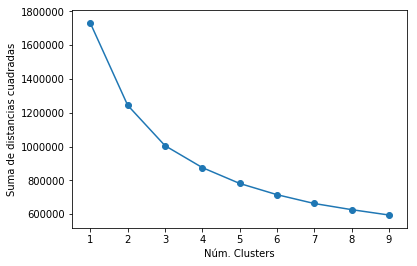

In [23]:
distancias=[]
for i in range(1,10):
    km=KMeans(n_clusters=i)
    km.fit(data_encode2)
    distancias.append(km.inertia_)

n_cluster=np.linspace(1,len(distancias),len(distancias))
plt.plot(n_cluster,distancias)
plt.scatter(n_cluster,distancias)
plt.xlabel('Núm. Clusters')
plt.ylabel('Suma de distancias cuadradas')

### 2 clusters

In [24]:
kmeans = KMeans(n_clusters=2).fit(data_encode2)
labels=kmeans.labels_
centroids=kmeans.cluster_centers_
centroids=np.round(centroids)
fil,col=centroids.shape

list_clases=list(dict_clases2.values())
list_nombres=[]
for f in range(fil):
    list_lab=[]
    for c in range(col):
        list_lab.append(list_clases[c][int(centroids[f,c])])
    list_nombres.append(list_lab)
print('Cluster 1:')
print([x for x in list_nombres[0] if x != 'nan'])
print('Cluster 2:')
print([x for x in list_nombres[1] if x != 'nan'])

Cluster 1:
['Male', '30-34', 'Suramérica', 'Master’s degree', 'Mathematics or statistics', 'Research Assistant', 'Retail/Sales', '4-5', '90-100,000', 'We use ML methods for generating insights (but do not put working models into production)']
Cluster 2:
['Male', '30-34', 'Otro', 'I prefer not to answer', 'Fine arts or performing arts', 'Manager', 'Government/Public Service', '2-3', '250-300,000', 'We have well established ML methods (i.e., models in production for more than 2 years)', 'Analyze and understand data to influence product or business decisions', 'Build prototypes to explore applying machine learning to new areas', 'Python', 'Numerical Data']


### 3 clústers

In [25]:
kmeans = KMeans(n_clusters=3).fit(data_encode2)
labels=kmeans.labels_
centroids=kmeans.cluster_centers_
centroids=np.round(centroids)
fil,col=centroids.shape

list_clases=list(dict_clases2.values())
list_nombres=[]
for f in range(fil):
    list_lab=[]
    for c in range(col):
        list_lab.append(list_clases[c][int(centroids[f,c])])
    list_nombres.append(list_lab)
print('Cluster 1:')
print([x for x in list_nombres[0] if x != 'nan'])
print('Cluster 2:')
print([x for x in list_nombres[1] if x != 'nan'])
print('Cluster 3:')
print([x for x in list_nombres[2] if x != 'nan'])

Cluster 1:
['Male', '30-34', 'Otro', 'I prefer not to answer', 'Fine arts or performing arts', 'Manager', 'Government/Public Service', '2-3', '125-150,000', 'We have well established ML methods (i.e., models in production for more than 2 years)', 'Analyze and understand data to influence product or business decisions', 'Build prototypes to explore applying machine learning to new areas', 'Python', 'Numerical Data']
Cluster 2:
['Male', '25-29', 'No formal education past high school', 'Mathematics or statistics', 'Salesperson', 'Shipping/Transportation', '5-10', '90-100,000']
Cluster 3:
['Male', '30-34', 'Otro', 'I prefer not to answer', 'Fine arts or performing arts', 'Developer Advocate', 'Hospitality/Entertainment/Sports', '2-3', '500,000+', 'We recently started using ML methods (i.e., models in production for less than 2 years)', 'Analyze and understand data to influence product or business decisions', 'Build prototypes to explore applying machine learning to new areas', 'Python', 'N

### 4 clústers

In [ ]:
kmeans = KMeans(n_clusters=4).fit(data_encode2)
labels=kmeans.labels_
centroids=kmeans.cluster_centers_
centroids=np.round(centroids)
fil,col=centroids.shape

list_clases=list(dict_clases2.values())
list_nombres=[]
for f in range(fil):
    list_lab=[]
    for c in range(col):
        list_lab.append(list_clases[c][int(centroids[f,c])])
    list_nombres.append(list_lab)
print('Cluster 1:')
print([x for x in list_nombres[0] if x != 'nan'])
print('Cluster 2:')
print([x for x in list_nombres[1] if x != 'nan'])
print('Cluster 3:')
print([x for x in list_nombres[2] if x != 'nan'])
print('Cluster 4:')
print([x for x in list_nombres[3] if x != 'nan'])

### 5 clústers

In [27]:
kmeans = KMeans(n_clusters=5).fit(data_encode2)
labels=kmeans.labels_
centroids=kmeans.cluster_centers_
centroids=np.round(centroids)
fil,col=centroids.shape

list_clases=list(dict_clases2.values())
list_nombres=[]
for f in range(fil):
    list_lab=[]
    for c in range(col):
        list_lab.append(list_clases[c][int(centroids[f,c])])
    list_nombres.append(list_lab)
print('Cluster 1:')
print([x for x in list_nombres[0] if x != 'nan'])
print('Cluster 2:')
print([x for x in list_nombres[1] if x != 'nan'])
print('Cluster 3:')
print([x for x in list_nombres[2] if x != 'nan'])
print('Cluster 4:')
print([x for x in list_nombres[3] if x != 'nan'])
print('Cluster 5:')
print([x for x in list_nombres[4] if x != 'nan'])

Cluster 1:
['Male', '30-34', 'Otro', 'I prefer not to answer', 'Fine arts or performing arts', 'Data Journalist', 'Computers/Technology', '15-20', '125-150,000', 'We have well established ML methods (i.e., models in production for more than 2 years)', 'Analyze and understand data to influence product or business decisions', 'Build prototypes to explore applying machine learning to new areas', 'Python', 'SQL', 'Categorical Data', 'Numerical Data', 'Text Data']
Cluster 2:
['Male', '30-34', 'Otro', 'I prefer not to answer', 'Fine arts or performing arts', 'Developer Advocate', 'Energy/Mining', '2-3', '70-80,000', 'We recently started using ML methods (i.e., models in production for less than 2 years)', 'Analyze and understand data to influence product or business decisions', 'Build prototypes to explore applying machine learning to new areas', 'Python', 'Numerical Data']
Cluster 3:
['Male', '25-29', 'No formal education past high school', 'Medical or life sciences (biology, chemistry, med

### Observaciones:

Nuevamente el agrupamiento no es el esperado en ninguno de los clústers y consideramos que es porque la cercanía geográfica no está funcionando bien con el LabelEncoder y además porque algunas de las variables tenidad en cuenta no son adecuadas para el agrupamiento

# PCA
Para solucionar los problemas anteriores, usamos Principal Componente Analysis para discriminar variables que no aportan al análisis. Primero visualizamos los dos componentes principales y después buscaremos el número de componentes necesarias para explicar la mayor parte de la varianza.

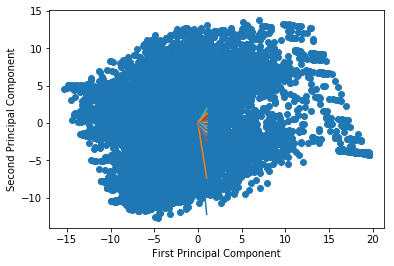

In [31]:
pca_none = PCA(n_components=None)
components_none = pca_none.fit_transform(data_encode2)

ev = pca_none.explained_variance_ratio_
cv = []
count = ev[0]
for i in range(0,ev.size):
    if i > 0:
        count += ev[i]
    cv.append(count)
def f(x, y):
    m = y/x
    return m

pca_2 = PCA(n_components=2)
nuevoX = pca_2.fit_transform(data_encode2)
comp= pca_2.components_

X1 = nuevoX[:,0]
X2 = nuevoX[:,1]

a = np.linspace(0,1)

plt.figure()
plt.scatter(X1, X2)
for i in range(0,comp[0,:].size):
    plt.plot(a, f(comp[0,i], comp[1,i])*a, label=str(i))
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()


Notar a continuación que el número de componentes necesarias es 4. Pues logran explicar más del 80% de la varianza

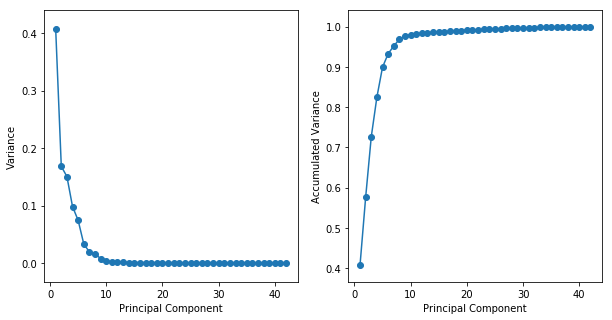

In [32]:
x_1 = np.linspace(1, ev.size, ev.size)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(x_1,ev)
plt.plot(x_1, ev)
plt.xlabel('Principal Component')
plt.ylabel('Variance')
plt.subplot(1,2,2)
plt.scatter(x_1,cv)
plt.plot(x_1, cv)
plt.xlabel('Principal Component')
plt.ylabel('Accumulated Variance')
plt.show()

## Discriminación por componentes principales
Buscaremos ahora las variables que más presencia tienen en nuestras componentes principales y trabajaremos con ellas.

In [33]:
pca_4 = PCA(n_components=4)
nuevoX = pca_4.fit_transform(data_encode2)
componentes= pca_4.components_
col=data_encode2.columns.values


sort_comp1=np.argsort(np.abs(componentes[0]))[::-1][0:7]
main_comp1=componentes[0][sort_comp1]
sort_names1=col[sort_comp1]

sort_comp2=np.argsort(np.abs(componentes[1]))[::-1][0:7]
main_comp2=componentes[1][sort_comp2]
sort_names2=col[sort_comp2]

sort_comp3=np.argsort(np.abs(componentes[2]))[::-1][0:7]
main_comp3=componentes[2][sort_comp3]
sort_names3=col[sort_comp3]

sort_comp4=np.argsort(np.abs(componentes[3]))[::-1][0:7]
main_comp4=componentes[3][sort_comp4]
sort_names4=col[sort_comp4]


d = {'Ejes 1': sort_names1,'Componente 1': main_comp1, 'Ejes 2': sort_names2,'Componente 2': main_comp2, 'Ejes 3': sort_names3,'Componente 3': main_comp3, 'Ejes 4': sort_names4,'Componente 4': main_comp4}
df = pd.DataFrame(data=d)

df

,Ejes 1,Componente 1,Ejes 2,Componente 2,Ejes 3,Componente 3,Ejes 4,Componente 4
0,Salario,0.638453,Labor,-0.886405,Industria,0.766483,Carrera,0.965362
1,Industria,0.568369,Salario,0.430164,Salario,-0.604608,Industria,-0.196396
2,Labor,0.334287,Industria,0.113910,Labor,-0.198236,Labor,-0.108214
3,Experiencia,0.287816,Experiencia,-0.105555,Carrera,0.067895,Salario,-0.104384
4,Carrera,0.229335,Carrera,-0.034339,Edad,-0.047859,Nivel de Educación,0.066398
5,ML en el trabajo,0.090611,Edad,0.027392,Nivel de Educación,0.018726,Experiencia,-0.031578
6,Continente,0.078897,Continente,-0.023039,Analizar datos,-0.007615,Edad,0.023412


La tabla anterior nos muestra las 6 variables que más explican la varianza de cada componente principal. Notar que en general se repiten las mismas en todas las componentes y podemos quedarnos con 8 variables que explican la mayor parte de la varianza:
- Salario
- Industria
- Labor
- Experiencia
- Carrera
- Continente
- Edad
- Nivel de Educación
    

In [34]:
data_new=data_work[['Industria', 'Labor', 'Experiencia', 'Carrera', 'Continente', 'Edad', 'Nivel de Educación', 'Salario']].dropna()

col_salario=data_new['Salario'].values
low_salary=np.array(['0-10,000', '10-20,000', '20-30,000', '30-40,000', '40-50,000', '50-60,000', '60-70,000', '70-80,000', '80-90,000',
       '90-100,000'])
high_salary=np.array(['100-125,000','125-150,000','150-200,000', '200-250,000', '250-300,000', '300-400,000', '400-500,000', '500,000+'])

col_rango=[]

for i in range(len(col_salario)):
    if(col_salario[i] in low_salary):
        col_rango.append(0)
    if(col_salario[i] in high_salary):
        col_rango.append(1)
col_rango=np.array(col_rango)
col_yes=col_rango[col_rango>0]
dy={'Rango de Ingresos': col_rango}
Y=pd.DataFrame(data=dy)


## K-means después de PCA
Asi pues, después de discriminar variables realizamos nuevamente k-means para observar el agrupamiento

In [35]:
dict_clases3 = {}
index=data_new.columns
i=0
for column in data_new.columns:
    if data_new[column].dtype == type(object):
        le = LabelEncoder()
        le.fit(data_new[column].astype(str))
        data_new[column] = le.fit_transform(data_new[column].astype(str))       
        clases=le.classes_
        dict_clases3[index[i]]=clases
        i+=1

X=data_new[['Industria', 'Labor', 'Experiencia', 'Carrera', 'Continente', 'Edad', 'Nivel de Educación']]        
X_train, X_validation, Y_train, Y_validation = sklearn.model_selection.train_test_split(X, Y, test_size=0.5)

In [39]:
kmeans = KMeans(n_clusters=3).fit(data_new)
labels=kmeans.labels_
centroids=kmeans.cluster_centers_
centroids=np.round(centroids)
fil,col=centroids.shape
list_clases=list(dict_clases3.values())

list_nombres=[]
for f in range(fil):
    list_lab=[]
    for c in range(col):
        list_lab.append(list_clases[c][int(centroids[f,c])])
    list_nombres.append(list_lab)
print('Cluster 1:')
print([x for x in list_nombres[0] if x != 'nan'])
print('Cluster 2:')
print([x for x in list_nombres[1] if x != 'nan'])
print('Cluster 3:')
print([x for x in list_nombres[2] if x != 'nan'])

Cluster 1:
['Online Service/Internet-based Services', 'Data Scientist', '2-3', 'Humanities (history, literature, philosophy, etc.)', 'Norteamérica', '30-34', 'I prefer not to answer', '250-300,000']
Cluster 2:
['Computers/Technology', 'Marketing Analyst', '2-3', 'Fine arts or performing arts', 'Europa', '30-34', 'I prefer not to answer', '100-125,000']
Cluster 3:
['Energy/Mining', 'Developer Advocate', '2-3', 'Fine arts or performing arts', 'Norteamérica', '30-34', 'I prefer not to answer', '500,000+']


### Resultados de k-means con k=3.
Notemos entonces que el agrupamiento mejora significativamente pues a pesar de mantenerse en ciencias sociales y humanidades, se mudó geográficamente a Norteamérica y Europa que son los dos continentes más desarrollados. Además, las Industrias más importantes se muestran como: Servicios en Línea, Computadores y Tecnología y Energía. Lo cual también tiene sentido. Además, notar que de acuerdo con la experiencia de 2 a 3 años en ML, se muestra que los métodos son efectivamente muy nuevos y lo son también en la industria y quienes los trabajan. Las oportinidades son muy buenas para los que entran.

# Un intento de SVM para predecir salario
Finalmente, intentamos predecir salario a partir de las variablas discriminadas con PCA. PAra esto, clasificamos entre salario alto y bajo.

In [36]:

clf = SVC(gamma='auto')
clf.fit(X_train, Y_train) 
Y_predict=clf.predict(X_validation)
conf_mat=confusion_matrix(Y_validation, Y_predict)
print(conf_mat)

C:\Users\Carlos Felipe\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[1672   36]
 [ 392   24]]


Text(0.5,1,'Precision-Recall curve: AP=0.21')

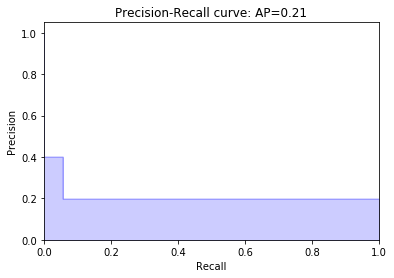

In [37]:

precision, recall, _ = precision_recall_curve(Y_validation, Y_predict)

average_precision = average_precision_score(Y_validation, Y_predict)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

In [ ]:
Notar que el modelo parece tener una tendencia hacia detector correctamente los de saario